#**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd

#**Loading the Birds Dataset**

There are many kinds of birds: pigeons, ducks, ostriches, penguins… Some are good at flying, others can't fly but run fast. Some swim under water, others wading in shallow pool.

According to their living environments and living habits, birds are classified into different ecological groups. There are 6 ecological groups of birds:

* Swimming Birds (SW)
* Wading Birds (W)
* Terrestrial Birds (T)
* Raptors (R)
* Scansorial Birds (P)
* Singing Birds (SO)

Apparently, birds belong to different ecological groups have different appearances: **flying birds have strong wings and wading birds have long legs**. Their living habits are somewhat reflected in their bones' shapes. As data scientists we may think of examining the underlying relationship between sizes of bones and ecological groups, and recognising birds' ecological groups by their bones' shapes.

**Content**

There are 420 birds contained in this dataset. Each bird is represented by 10 measurements (features):

* Length and Diameter of Humerus
* Length and Diameter of Ulna
* Length and Diameter of Femur
* Length and Diameter of Tibiotarsus
* Length and Diameter of Tarsometatarsus

In [2]:
bird_data = pd.read_csv('/workspace/DNN_Lab/Data_set/bird.csv', delimiter = ',')
bird_data.head(5)

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


#**Accessing the Column Names in the Dataset**

In [3]:
bird_data.columns

Index(['id', 'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw', 'type'],
      dtype='object')

In [4]:
bird_data = bird_data.set_index('id')
bird_data.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
id,,,,,,,,,,,
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


#**Finding the Shape of the Dataset**

In [5]:
bird_data.shape

(420, 11)

In [6]:
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    419 non-null    float64
 1   humw    419 non-null    float64
 2   ulnal   417 non-null    float64
 3   ulnaw   418 non-null    float64
 4   feml    418 non-null    float64
 5   femw    419 non-null    float64
 6   tibl    418 non-null    float64
 7   tibw    419 non-null    float64
 8   tarl    419 non-null    float64
 9   tarw    419 non-null    float64
 10  type    420 non-null    object 
dtypes: float64(10), object(1)
memory usage: 39.4+ KB


#**Checking Missing Values**

In [ ]:
bird_data.isna().sum()

huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

In [ ]:
bird_data.dropna(how='any', inplace=True) #how='any'- any row containing at least one missing value (NaN) will be dropped

In [ ]:
bird_data.isna().sum()

huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [ ]:
bird_data.shape

(413, 11)

# **Unique Values in the Data**

In [ ]:
bird_data.nunique()

huml     403
humw     319
ulnal    394
ulnaw    305
feml     397
femw     287
tibl     401
tibw     283
tarl     403
tarw     277
type       6
dtype: int64

In [ ]:
bird_data['type'].unique() #unique value in the type coloumn

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

# **Label Encoding of Categorical Variables**

Label Encoding means converting categorical features into numerical values. So that they can be fitted by machine learning models which only take numerical data.

**Example:** 
Suppose we have a column Height in some dataset that has elements as Tall, Medium, and short. To convert this categorical column into a numerical column we will apply label encoding to this column. After applying label encoding, the Height column is converted into a numerical column having elements 0,1, and 2 where 0 is the label for tall, 1 is the label for medium, and 2 is the label for short height.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bird_data[['type']] = bird_data[['type']].apply(le.fit_transform) 

In [ ]:
bird_data.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
id,,,,,,,,,,,
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


#**Seperating Label from Data**

In [ ]:
y = bird_data['type']
X = bird_data.drop(['type'],axis=1)

In [ ]:
X.columns

Index(['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw'],
      dtype='object')

In [ ]:
y

id
0      3
1      3
2      3
3      3
4      3
      ..
415    2
416    2
417    2
418    2
419    2
Name: type, Length: 413, dtype: int64

In [ ]:
y.shape

(413,)

#**One-Hot-Encoding**

* It allows the use of categorical variables in models that require numerical input.
* It can improve model performance by providing more information to the model about the categorical variable.
* It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).

In [ ]:
from keras.utils import np_utils
num_classes = 6
y = np_utils.to_categorical(y, num_classes)
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

#**Splitting the Data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (330, 10)
Shape of the X_test (83, 10)
Shape of the y_train (330, 6)
Shape of the y_test (83, 6)


# **Feature Scaling:**
The result of **standardization** (or **Z-Score normalization**) is that the features will be re scaled so that they'll have the properties of a standard normal distribution with: 
$$\mu = 0$$
And
$$\sigma = 1$$

Where $\mu$ is the mean(average) and $\sigma$ is the standard deviation from the mean; standard scores (also called **Z** scores) of the sampels are calculated as follows: 
$$z = \frac{x - \mu}{\sigma}$$

***

# **About Min-Max Scaling**

An alternative approach to **Z-Score** normalization (or called standardization) is the so-called **Min-Max Scaling** (often also simply called **Normalization** - a common cause for ambiguities)

In this approach, the data is scaled to a fixed range - usually `[0, 1]`. 
The cost of having this bounded range - in contrast to standrdization - is that we will end up with smaaller standard deviations, which can suppress the effect of outliers. 

**Note**:

If the dataset have lot's of outliers, and the algorithms are sensitive to outliers, please use `Min-Max Scaler`

A `Min-Max Scaling` is typically done via the foloowing equation: 

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset. 


# **Z-Score Standardization or Min-Max Scaling**

"Standardization or Min-Max scaling"? - There is no obvious answer to this question: it really depends on the application. 

However this doesn't mean that `Min-Max Scaling` is not useful at all, A popular application is `image processing`, where pixel intensities have to be normalized to fit withint a certain range (i.e., `[0, 255]` for the RGB colour range). Also, typical _Neural Network_ Algorithm require data that on a `0 - 1` scale. 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Building the ANN Model**

In [ ]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

# **Compiling and Fitting the Model**

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 16, epochs = 800, verbose = 1)

Epoch 1/800
21/21 [==============================] - 1s 3ms/step - loss: 1.7866 - accuracy: 0.2697 
Epoch 2/800
21/21 [==============================] - 0s 2ms/step - loss: 1.7700 - accuracy: 0.4000
Epoch 3/800
21/21 [==============================] - 0s 3ms/step - loss: 1.7358 - accuracy: 0.4879
Epoch 4/800
21/21 [==============================] - 0s 3ms/step - loss: 1.6627 - accuracy: 0.4818
Epoch 5/800
21/21 [==============================] - 0s 3ms/step - loss: 1.5820 - accuracy: 0.4758
Epoch 6/800
21/21 [==============================] - 0s 3ms/step - loss: 1.5225 - accuracy: 0.4848
Epoch 7/800
21/21 [==============================] - 0s 2ms/step - loss: 1.4453 - accuracy: 0.5030
Epoch 8/800
21/21 [==============================] - 0s 2ms/step - loss: 1.3775 - accuracy: 0.5000
Epoch 9/800
21/21 [==============================] - 0s 2ms/step - loss: 1.3274 - accuracy: 0.5091
Epoch 10/800
21/21 [==============================] - 0s 2ms/step - loss: 1.3011 - accuracy: 0.5121
Epoch 11

#**Testing the Model**

In [ ]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

33/33 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9576
Train score: 0.12051080912351608
Train accuracy: 0.9575757384300232
********************
9/9 [==============================] - 0s 3ms/step - loss: 0.2907 - accuracy: 0.9398
Test score: 0.29074811935424805
Test accuracy: 0.9397590160369873


#**Confusion Matrix**

### * **Accuracy** 
number of examples correctly predicted / total number of examples  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [ ]:
# Predicting the Test set results
pred = classifier.predict(X_test)
print("Y_pred:", pred)
print("*****************")
y_pred = np.argmax(pred, axis = 1)
print("Y_pred:", y_pred)
print("*****************")
print("Y_test:", y_test)
y_true = np.argmax(y_test, axis = 1)
print("*****************")
print("Y_test:", y_true)

3/3 [==============================] - 0s 5ms/step
Y_pred: [[7.17333705e-06 1.03993067e-28 9.99991357e-01 8.44836023e-09
  1.53046209e-09 1.44684941e-06]
 [6.75895280e-05 9.20304418e-01 8.98783825e-11 2.72409961e-04
  3.23086490e-18 7.93555379e-02]
 [1.36515696e-03 2.57673441e-04 2.17169733e-03 3.82157972e-10
  9.96201396e-01 4.07924745e-06]
 [9.37421978e-01 2.49129542e-15 7.95660075e-03 1.95225381e-04
  1.02738373e-10 5.44262379e-02]
 [1.69942560e-10 2.48615764e-16 5.35640266e-33 1.84594579e-02
  0.00000000e+00 9.81540561e-01]
 [2.26030042e-10 2.52109834e-30 6.22116417e-24 9.94344234e-01
  0.00000000e+00 5.65575017e-03]
 [8.91250670e-02 8.92292976e-01 9.41491046e-04 2.52694213e-06
  8.48509662e-05 1.75530985e-02]
 [7.47243059e-04 6.29785178e-27 1.15756065e-05 9.21764255e-01
  5.33633328e-22 7.74768218e-02]
 [4.26773960e-03 9.83574748e-01 3.86153147e-07 2.30666373e-07
  5.12865722e-11 1.21569633e-02]
 [7.24675544e-07 7.49303997e-01 3.15264244e-15 2.51754913e-02
  5.71808169e-26 2.25519

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
target_names = ['P', 'R', 'SO', 'SW', 'T', 'W']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 23.52222222222222, 'Predicted label')

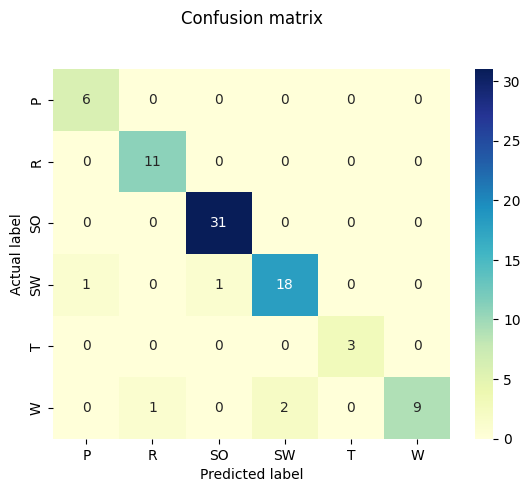

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True,xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Classification Report**
#**Classification Report**

### * **True Positive Rate**
number of samples actually and predicted as  `Positive` / total number of samples actually `Positive`  
Also called **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


### * **Positive Predictive Value**
number of samples actually and predicted as  `Positive` / total number of samples predicted as `Positive`  
Also called **Precision**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)

### * **F1 score**
Harmonic Mean of Precision and Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred, target_names = target_names))

              precision    recall  f1-score   support

           P       0.86      1.00      0.92         6
           R       0.92      1.00      0.96        11
          SO       0.97      1.00      0.98        31
          SW       0.90      0.90      0.90        20
           T       1.00      1.00      1.00         3
           W       1.00      0.75      0.86        12

    accuracy                           0.94        83
   macro avg       0.94      0.94      0.94        83
weighted avg       0.94      0.94      0.94        83



#**ROC curve**

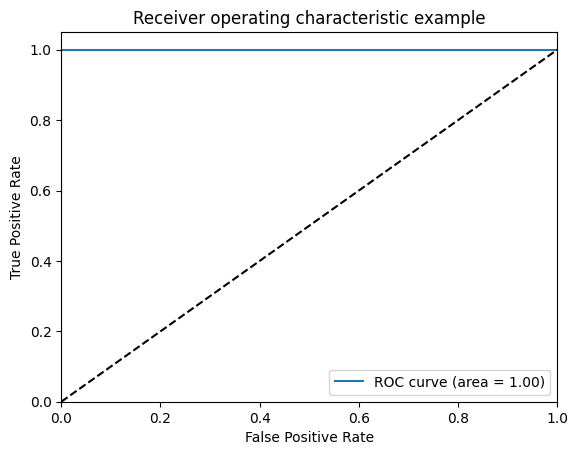

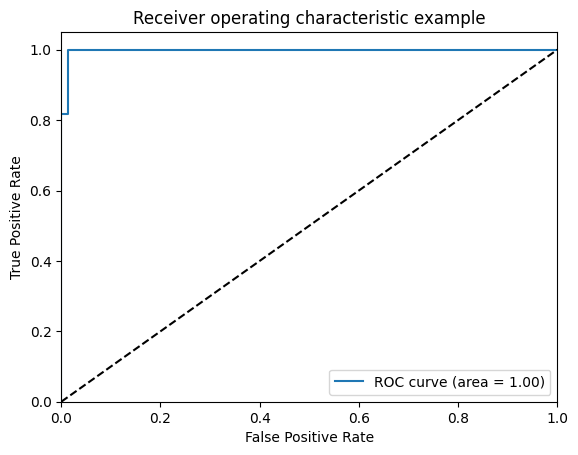

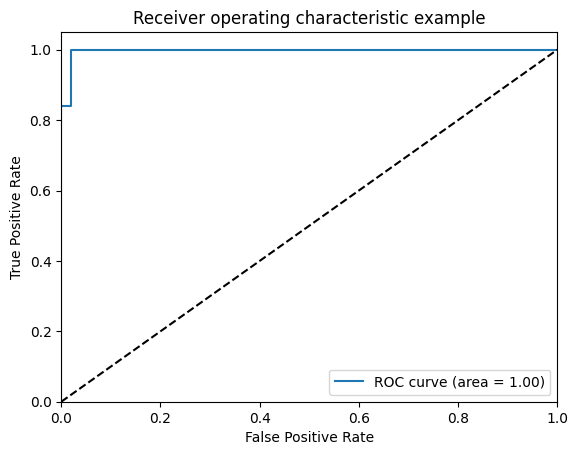

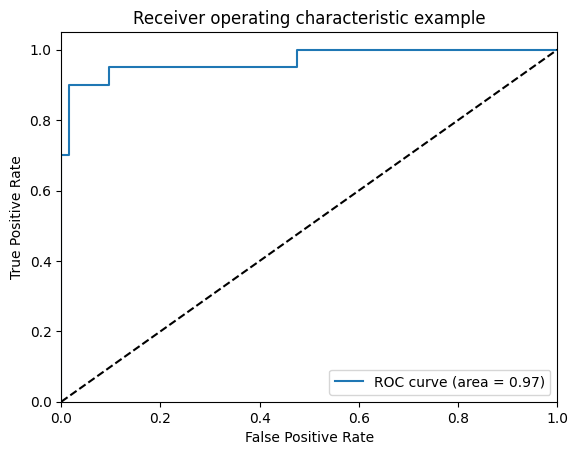

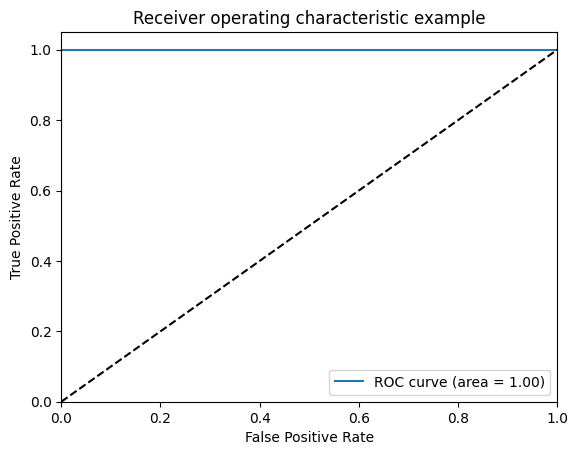

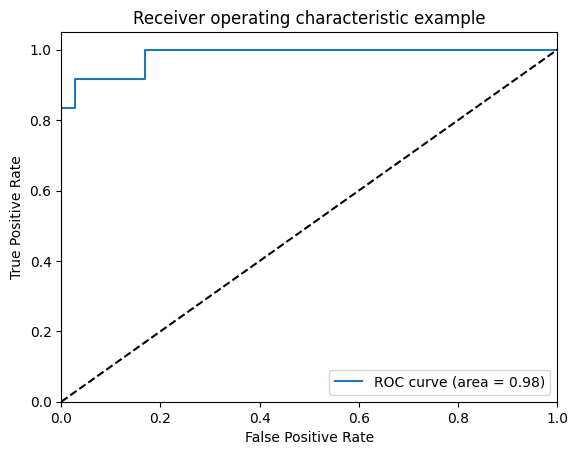

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(6):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

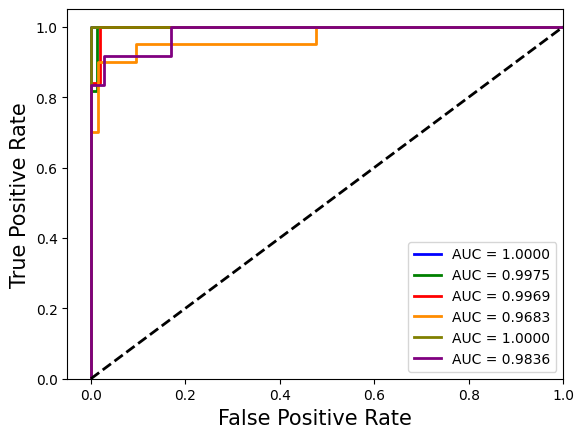

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors =cycle(['blue', 'green', 'red','darkorange','olive','purple'])
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='AUC = {1:0.4f}'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()